In [ ]:
import math
from math import floor, ceil 
import re
from collections import Counter
import numpy as np
import heapq


def find_ngrams(string: str, split_num: int=3) -> set:
    """
    Slice string into ngrams.
    Returns array of ngrams for the given string.
    Arguments:
        text: the string to find ngrams for.
        split_num: the length the ngrams should be. Defaults to 3 (trigrams).
    """
    try:
        if not string:
            return set()

        words = [f'  {x} ' for x in re.split(r'\W+', str(string).lower()) if x.strip()]

        ngrams = set()

        for word in words:
            for x in range(0, len(word) - split_num + 1):
                ngrams.add(word[x:x+split_num])

        return ngrams

    except:
        return None


def trigram(text1: str, text2: str, split_num: int=3):
    """
    Find the similarity between two strings using ngrams.
    Returns float score value, 0.0 being completely different strings and 1.0 being equal strings.
    Arguments:
        text1: main string to compare against.
        text2: second string to compare to text1.
        split_num: the length the ngrams should be. Defaults to 3 (trigrams).
    """
    try:
        ngrams1 = find_ngrams(text1, split_num)
        ngrams2 = find_ngrams(text2, split_num)

        num_unique = len(ngrams1 | ngrams2)
        num_equal = len(ngrams1 & ngrams2)

        score = round(float(num_equal) / float(num_unique), 6)

        return score

    except:
        return None


def cosine(text1, text2):
    """
    Find the similarity between two strings using cosine vectors.
    Returns float score value, 0.0 being completely different strings and 1.0 being equal strings.
    Arguments:
        text1: main string to compare against.
        text2: second string to compare to text1.
    """
    try:
        vec1 = Counter(re.compile(r"\w+").findall(text1))
        vec2 = Counter(re.compile(r"\w+").findall(text2))
        intersection = set(vec1.keys()) & set(vec2.keys())
        numerator = sum([vec1[x] * vec2[x] for x in intersection])

        sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
        sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
        denominator = math.sqrt(sum1) * math.sqrt(sum2)

        if not denominator:
            return 0.0
        else:
            return float(numerator) / denominator

    except:
        return None


def levenshtein(text1, text2):
    """
    Find the similarity between two strings using Levenshtein distance.
    Returns float score value, 0.0 being completely different strings and 1.0 being equal strings.
    Arguments:
        text1: main string to compare against.
        text2: second string to compare to text1.
    """
    try:
        size_x = len(text1) + 1
        size_y = len(text2) + 1
        matrix = np.zeros ((size_x, size_y))
        for x in range(size_x):
            matrix [x, 0] = x
        for y in range(size_y):
            matrix [0, y] = y

        for x in range(1, size_x):
            for y in range(1, size_y):
                if text1[x-1] == text2[y-1]:
                    matrix [x,y] = min(
                        matrix[x-1, y] + 1,
                        matrix[x-1, y-1],
                        matrix[x, y-1] + 1
                    )
                else:
                    matrix [x,y] = min(
                        matrix[x-1,y] + 1,
                        matrix[x-1,y-1] + 1,
                        matrix[x,y-1] + 1
                    )
        distance = matrix[size_x - 1, size_y - 1]
        score = (max(len(text1), len(text2)) - distance) / max(len(text1), len(text2))
        return float(score)

    except:
        return None


def jaro_winkler(s1, s2):
    """
    Find the similarity between two strings using Jaro-Winkler distance.
    Returns float score value, 0.0 being completely different strings and 1.0 being equal strings.
    Arguments:
        text1: main string to compare against.
        text2: second string to compare to text1.
    """
    try:
        if (s1 == s2): 
            return 1.0
    
        len1 = len(s1) 
        len2 = len(s2) 
        max_dist = floor(max(len1, len2) / 2) - 1
        match = 0
        hash_s1 = [0] * len(s1) 
        hash_s2 = [0] * len(s2) 

        for i in range(len1): 
            for j in range(max(0, i - max_dist),  
                        min(len2, i + max_dist + 1)): 
                
                if (s1[i] == s2[j] and hash_s2[j] == 0): 
                    hash_s1[i] = 1
                    hash_s2[j] = 1
                    match += 1
                    break

        if (match == 0): 
            return 0.0
    
        t = 0
        point = 0

        for i in range(len1): 
            if (hash_s1[i]): 
     
                while (hash_s2[point] == 0): 
                    point += 1
    
                if (s1[i] != s2[point]): 
                    point += 1
                    t += 1
        t = t//2
    
        return float(match/ len1 + match / len2 + 
                (match - t + 1) / match)/ 3.0
    except:
        return None
        
def extract(query, choices, match_type='trigram', score_cutoff=0, limit=5):
    """
    Find the similarity between a query item and a list of choices.
    Returns a tuple of all choices and their associated similarity score.
     Arguments:
        query: The string you are wanting to match.
        choices: An iterable or dictionary-like object containing choices
            to be matched against the query.
        score_cutoff: Optional argument for score threshold. If the best
            match is found, but it is not greater than this number, then
            return None anyway ("not a good enough match").  Defaults to 0.
    """
    try:
        if match_type == 'trigram':
            match_type = algorithims.trigram
        elif match_type == 'levenshtein':
            match_type = algorithims.levenshtein
        elif match_type == 'cosine':
            match_type = algorithims.cosine
        elif match_type == 'jaro_winkler':
            match_type = algorithims.jaro_winkler
        try:
            if choices is None or len(choices) == 0:
                return
        except TypeError:
            pass

        results = []
        
        for i in choices:
            score = (match_type(query, i))
            data = (i, score)
            if score >= score_cutoff:
                results.append(data) #menambah nilai pada list di urutan terakhir


        return heapq.nlargest(limit, results, key=lambda i: i[1]) if limit is not None else \
            sorted(results, key=lambda i: i[1], reverse=True)

        # return results

    except:
        return None


def extractOne(query, choices, match_type='trigram', score_cutoff=0):
    """
    Finds the most similar item to query item from a list of choices.
    Returns tuple of best choice and its associated similarity score.
     Arguments:
        query: The string you are wanting to match.
        choices: An iterable or dictionary-like object containing choices
            to be matched against the query.
        score_cutoff: Optional argument for score threshold. If the best
            match is found, but it is not greater than this number, then
            return None anyway ("not a good enough match"). Defaults to 0.
    """

    try:
        best_list = extract(query, choices, match_type, score_cutoff)

        best = max(best_list, key=lambda i: i[1])

        return best

    except:
        return None

In [ ]:
import csv

data = []

with open('pkl pertanyaan tok.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=",")
  for row in csv_reader:
    data.append(row)

labels = data.pop(0)

print(labels)
print(data)

['Pertanyaan']
[['hai kak'], ['halo kak'], ['pagi kak'], ['siang kak'], ['sore kak'], ['malam kak'], ['selamat pagi'], ['selamat siang'], ['selamat sore'], ['selamat malam'], ['permisi'], ['hi'], ['pagi kak beli'], ['siang kak beli'], ['sore kak beli'], ['malam kak beli'], ['halo sis beli'], ['permisi kak'], ['kak pesan'], ['harganya kak'], ['harganya'], ['harga'], ['halo kak barangnya ready'], ['barang ready'], ['barangnya ready'], ['hai kak barangnya ready'], ['halo kak stoknya aja'], ['stoknya aja'], ['sisa kak'], ['varian lemon '], ['varian lemon kak'], ['lemon kak'], ['lemon'], ['varian kopi'], ['varian kopi kak'], ['kopi kak'], ['kopi'], ['varian greentea '], ['varian greentea kak'], ['greentea kak'], ['greentea']]


In [ ]:
print("T :", trigram(''.join(data[31]),''.join(data[32])))
print("L :", levenshtein(''.join(data[31]),''.join(data[32])))
print("jw:", jaro_winkler(''.join(data[31]),''.join(data[32])))
print("c :", cosine(''.join(data[31]),''.join(data[32])))

T : 0.6
L : 0.5555555555555556
jw: 0.7851851851851852
c : 0.7071067811865475


In [ ]:
i = 0
n =10
jum=0
while i <= n:
  jum += trigram(''.join(data[i]),''.join(data[i+1]))
  i+=1 
Rerata_t2 = jum/n
print("Rerata Dua Kata Trigram ialah : ", Rerata_t2)

j = 12
m = 15
jm =0
while j <= m:
  jm += trigram(''.join(data[j]),''.join(data[j+1])) 
  j+=1
Rerata_t3 = jm/3
print("Rerata Tiga Kata Trigram ialah : ", Rerata_t3)

k=22
o=25
mj=0
while k <= o:
  mj += trigram(''.join(data[k]),''.join(data[k+1])) 
  k+=1
Rerata_KataMiripT = mj/3
print("Rerata Kata Mirip Beda Panjang Trigram ialah : ", Rerata_KataMiripT)

a=29
b=39
ab=0
while a <= b:
  ab += trigram(''.join(data[a]),''.join(data[a+1])) 
  a+=1
Rerata_KataMaknaSamaBedaKuantiti = ab/10
print("Rerata Kata Makna Sama Beda Kuantiti Trigram ialah : ", Rerata_KataMaknaSamaBedaKuantiti)

Rerata Dua Kata Trigram ialah :  0.31527210000000006
Rerata Tiga Kata Trigram ialah :  0.544883
Rerata Kata Mirip Beda Panjang Trigram ialah :  0.6834343333333334
Rerata Kata Makna Sama Beda Kuantiti Trigram ialah :  0.6053582


In [ ]:
i = 0
n=10
jum=0
while i <= n:
  jum += levenshtein(''.join(data[i]),''.join(data[i+1]))
  i+=1 
Rerata_l2 = jum/n
print("Rerata Dua Kata levenshtein ialah : ", Rerata_l2)

j = 12
m = 15
jm =0
while j <= m:
  jm += levenshtein(''.join(data[j]),''.join(data[j+1])) 
  j+=1
Rerata_l3 = jm/3
print("Rerata Tiga Kata levenshtein ialah : ", Rerata_l3)


k=22
o=25
mj=0
while k <= o:
  mj += levenshtein(''.join(data[k]),''.join(data[k+1])) 
  k+=1
Rerata_KataMiripL = mj/3
print("Rerata Kata Mirip Beda Panjang Leivenstein ialah : ", Rerata_KataMiripL)

a=29
b=39
ab=0
while a <= b:
  ab += levenshtein(''.join(data[a]),''.join(data[a+1])) 
  a+=1
Rerata_KataMaknaSamaBedaKuantiti = ab/10
print("Rerata Kata Makna Sama Beda Kuantiti levenshtein ialah : ", Rerata_KataMaknaSamaBedaKuantiti)

Rerata Dua Kata levenshtein ialah :  0.5643925518925519
Rerata Tiga Kata levenshtein ialah :  0.880952380952381
Rerata Kata Mirip Beda Panjang Leivenstein ialah :  0.8101449275362319
Rerata Kata Makna Sama Beda Kuantiti levenshtein ialah :  0.5990982190324297


In [ ]:
i = 0
n=10
jum=0
while i <= n:
  jum += jaro_winkler(''.join(data[i]),''.join(data[i+1]))
  i+=1 
Rerata_jw2 = jum/n
print("Rerata Dua Kata jaro_winkler ialah : ", Rerata_jw2)

j = 12
m = 15
jm =0
while j <= m:
  jm += jaro_winkler(''.join(data[j]),''.join(data[j+1])) 
  j+=1
Rerata_jw3 = jm/3
print("Rerata Tiga Kata jaro_winkler ialah : ", Rerata_jw3)

k=22
o=25
mj=0
while k <= o:
  mj += jaro_winkler(''.join(data[k]),''.join(data[k+1])) 
  k+=1
Rerata_KataMiripJW = mj/3
print("Rerata Kata Mirip Beda Panjang Jaro_Winkler ialah : ", Rerata_KataMiripJW)

a=29
b=39
ab=0
while a <= b:
  ab += jaro_winkler(''.join(data[a]),''.join(data[a+1])) 
  a+=1
Rerata_KataMaknaSamaBedaKuantiti = ab/10
print("Rerata Kata Makna Sama Beda Kuantiti Jaro Winkler ialah : ", Rerata_KataMaknaSamaBedaKuantiti)

Rerata Dua Kata jaro_winkler ialah :  0.6994030044030044
Rerata Tiga Kata jaro_winkler ialah :  0.9632275132275131
Rerata Kata Mirip Beda Panjang Jaro_Winkler ialah :  0.9267899170073083
Rerata Kata Makna Sama Beda Kuantiti Jaro Winkler ialah :  0.8503132369579738


In [ ]:
i = 0
n=10
jum=0
while i <= n:
  jum += cosine(''.join(data[i]),''.join(data[i+1])) 
  i+=1
Rerata_c2 = jum/n
print("Rerata Dua Kata cosine ialah : ", Rerata_c2)

j = 12
m = 15
jm =0
while j <= m:
  jm += cosine(''.join(data[j]),''.join(data[j+1])) 
  j+=1
Rerata_c3 = jm/3
print("Rerata Tiga Kata cosine ialah : ", Rerata_c3)

k=22
o=25
mj=0
while k <= o:
  mj += cosine(''.join(data[k]),''.join(data[k+1])) 
  k+=1
Rerata_KataMiripc = mj/3
print("Rerata Kata Mirip Beda Panjang cosine ialah : ", Rerata_KataMiripc)

a=29
b=39
ab=0
while a <= b:
  ab += cosine(''.join(data[a]),''.join(data[a+1])) 
  a+=1
Rerata_KataMaknaSamaBedaKuantiti = ab/10
print("Rerata Kata Makna Sama Beda Kuantiti Cosine ialah : ", Rerata_KataMaknaSamaBedaKuantiti)

Rerata Dua Kata cosine ialah :  0.39999999999999997
Rerata Tiga Kata cosine ialah :  0.7777777777777778
Rerata Kata Mirip Beda Panjang cosine ialah :  0.6035533905932736
Rerata Kata Makna Sama Beda Kuantiti Cosine ialah :  0.7020299829126


In [ ]:
Trigram = (Rerata_t2 + Rerata_t3 + Rerata_KataMiripT+Rerata_KataMaknaSamaBedaKuantiti)/4
Leveinsthein = (Rerata_l2 + Rerata_l3 + Rerata_KataMiripL+Rerata_KataMaknaSamaBedaKuantiti)/4
JaroWinkler = (Rerata_jw2 + Rerata_jw3 + Rerata_KataMiripJW+Rerata_KataMaknaSamaBedaKuantiti)/4
Cosine = (Rerata_c2 + Rerata_c3 + Rerata_KataMiripc+Rerata_KataMaknaSamaBedaKuantiti)/4
print("Maka Kesimpulan Perbandingan Algortima Yang Didapatkan ")
print("Rata-rata untuk Trigram      ialah ", Trigram )
print("Rata-rata untuk Leveinsthein ialah ", Leveinsthein )
print("Rata-rata untuk Jaro Winkler ialah ", JaroWinkler )
print("Rata-rata untuk Cosine       ialah ", Cosine )

Maka Kesimpulan Perbandingan Algortima Yang Didapatkan 
Rata-rata untuk Trigram      ialah  0.5614048540614833
Rata-rata untuk Leveinsthein ialah  0.7393799608234413
Rata-rata untuk Jaro Winkler ialah  0.8228626043876064
Rata-rata untuk Cosine       ialah  0.6208402878209129


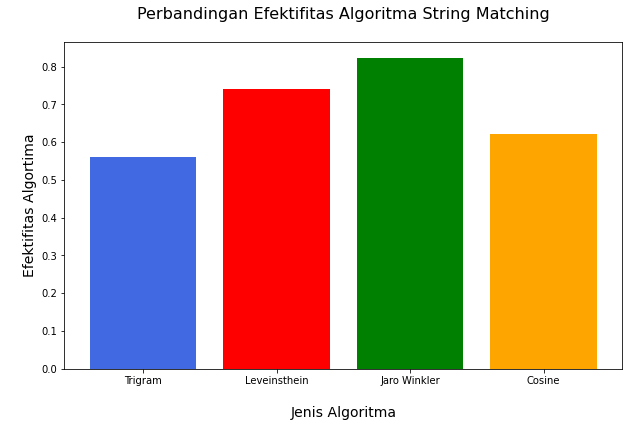

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(['Trigram','Leveinsthein', 'Jaro Winkler','Cosine' ],[Trigram , Leveinsthein,JaroWinkler,Cosine],color=['royalblue','red', 'green', 'orange'] )
plt.xlabel('\nJenis Algoritma', size=14)
plt.ylabel('\nEfektifitas Algortima', size=14)
plt.title('Perbandingan Efektifitas Algoritma String Matching\n', size=16)
plt.show()